In [1]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data=pd.read_excel("data_set_1.xlsx")

In [3]:
data.head(10)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
5,2012.666667,7.1,2175.03000,3,24.96305,121.51254,3,828,32.1
6,2012.666667,34.5,623.47310,7,24.97933,121.53642,3,1115,40.3
7,2013.416667,20.3,287.60250,6,24.98042,121.54228,3,1316,46.7
8,2013.500000,31.7,5512.03800,1,24.95095,121.48458,1,588,18.8
9,2013.416667,17.9,1783.18000,3,24.96731,121.51486,2,1075,22.1


In [4]:
data.shape

(414, 9)

In [5]:
data.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [7]:
#checking for null values
data.isna().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

## Great ! There are no null values in our dataset.

In [8]:
#Checking for correlations among columns
data.corr()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529
House Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


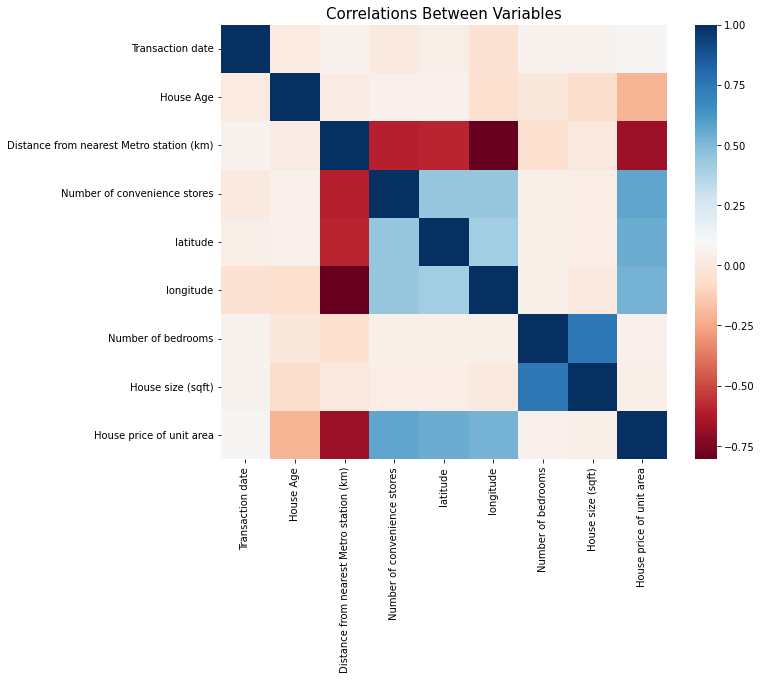

In [9]:
#plotting the above data in the form of a heatmap using seaborn
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

## We can observe that "Transaction date", "Number of bedrooms" and "House size (sqft)" have very small correlations with respect to "House price of unit area" (0.087529,0.050265 and 0.046489 respectively). Hence these features contribute very less to the overall pricing of the house of unit area and for this reason we drop the above features.

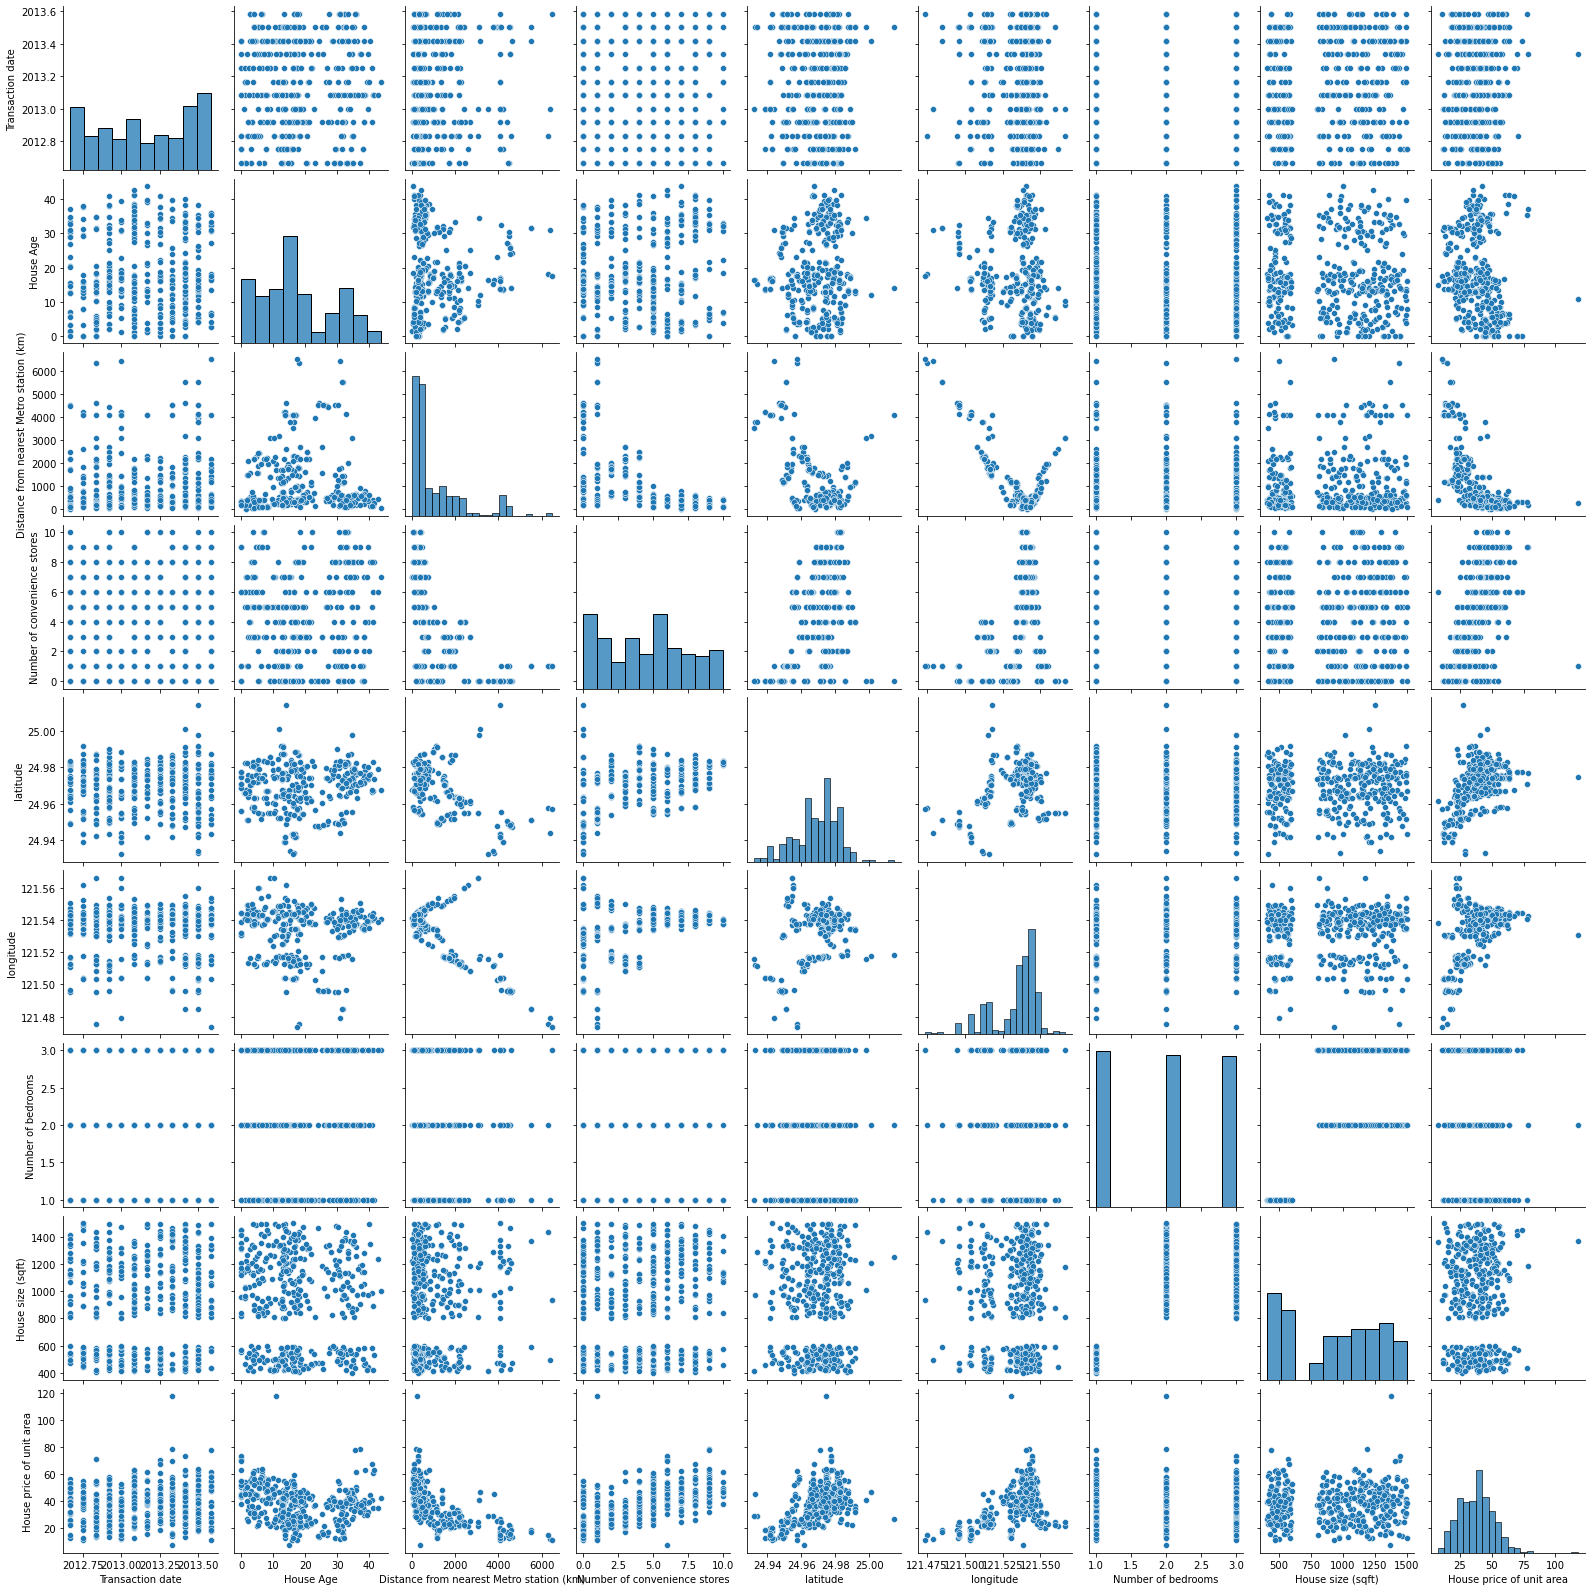

In [10]:
# Visualising data using pair plot
sns.pairplot(data)

In [11]:
#Selecting the useful features from the dataset by applying the condition below
important_cols = list(data.corr()["House price of unit area"][(data.corr()["House price of unit area"]>0.20) | (data.corr()["House price of unit area"]<-0.20)].index)
data_new = data[important_cols]
#(instead of this we could have simply dropped the above mentioned 3 columns)

In [12]:
data_new.head(10)

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
5,7.1,2175.03000,3,24.96305,121.51254,32.1
6,34.5,623.47310,7,24.97933,121.53642,40.3
7,20.3,287.60250,6,24.98042,121.54228,46.7
8,31.7,5512.03800,1,24.95095,121.48458,18.8
9,17.9,1783.18000,3,24.96731,121.51486,22.1


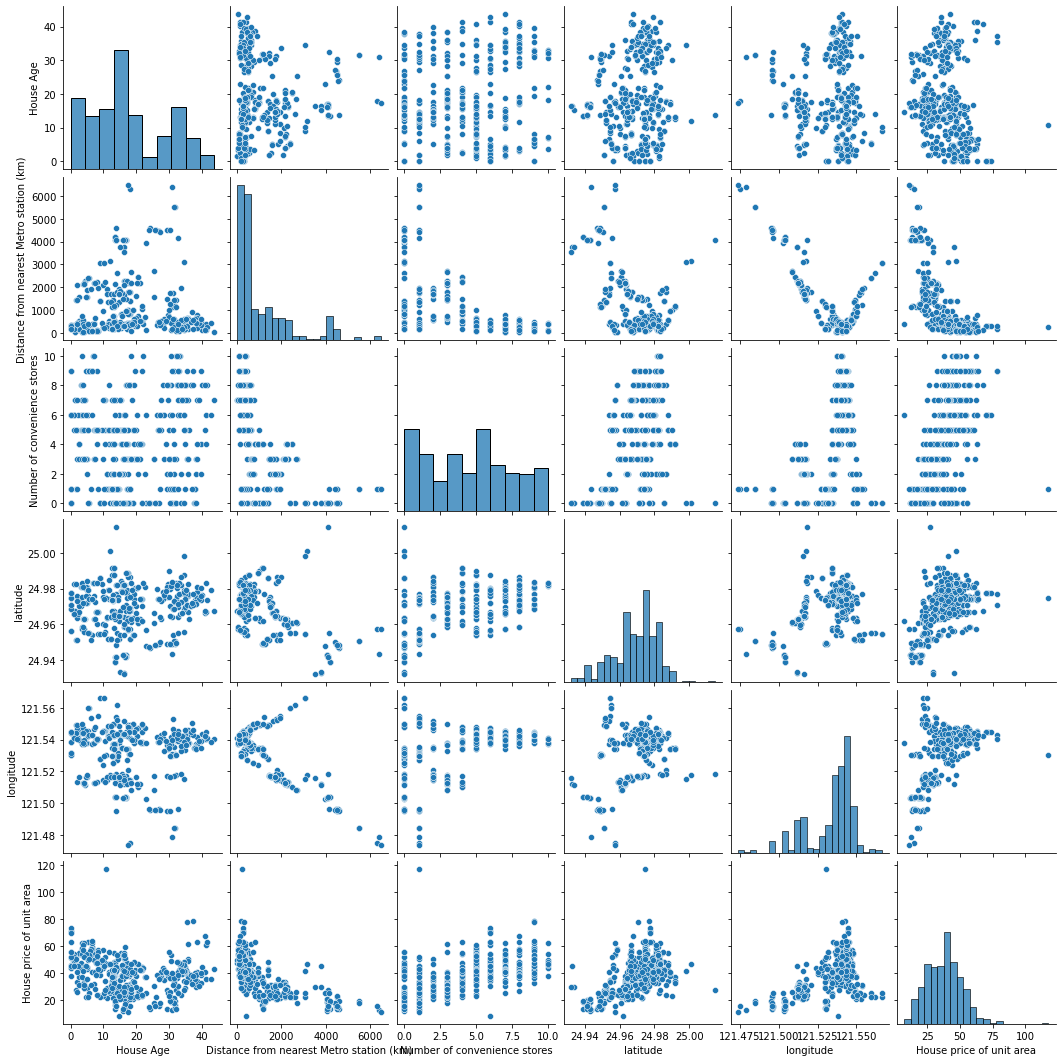

In [13]:
#Visualizing the new data
sns.pairplot(data_new)

<Figure size 720x576 with 0 Axes>

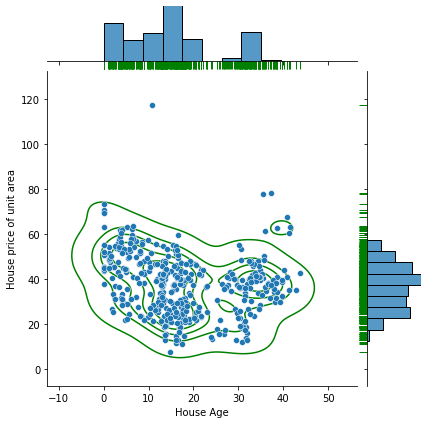

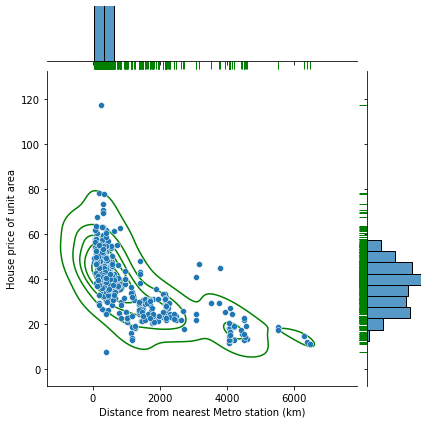

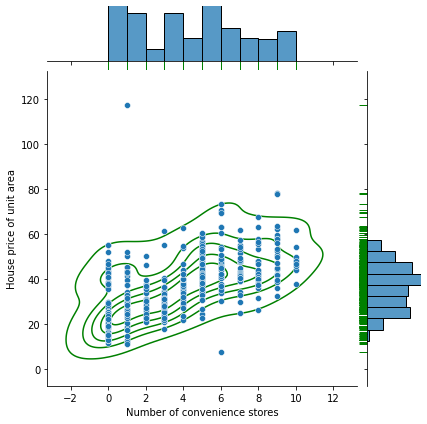

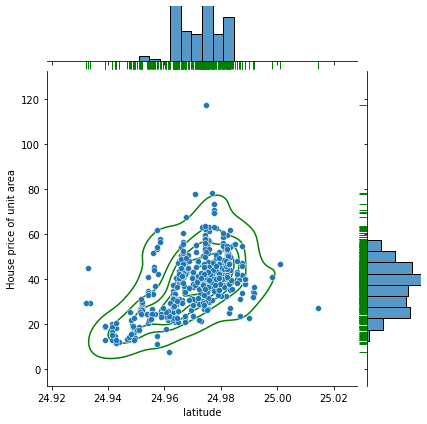

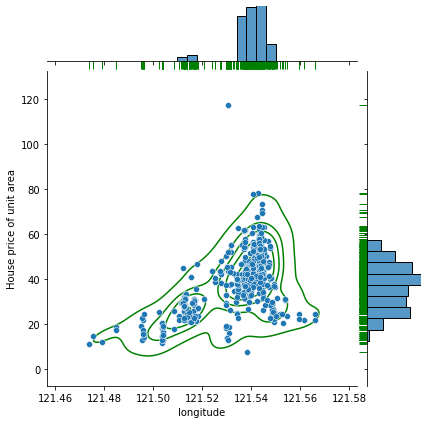

In [14]:
# plotting kernel density estimation plots along with histograms and scatter plots using jointplot of seaborn
# This gives an even better visualization and understanding of the data 
plt.figure(figsize=(10,8))

g = sns.jointplot(data=data_new, x="House Age", y="House price of unit area")
g.plot_joint(sns.kdeplot, color="g", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="g", height=-.15, clip_on=False)

g = sns.jointplot(data=data_new, x="Distance from nearest Metro station (km)", y="House price of unit area")
g.plot_joint(sns.kdeplot, color="g", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="g", height=-.15, clip_on=False)

g = sns.jointplot(data=data_new, x="Number of convenience stores", y="House price of unit area")
g.plot_joint(sns.kdeplot, color="g", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="g", height=-.15, clip_on=False)

g = sns.jointplot(data=data_new, x="latitude", y="House price of unit area")
g.plot_joint(sns.kdeplot, color="g", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="g", height=-.15, clip_on=False)

g = sns.jointplot(data=data_new, x="longitude", y="House price of unit area")
g.plot_joint(sns.kdeplot, color="g", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="g", height=-.15, clip_on=False)

plt.show()

In [15]:
X = data_new.drop("House price of unit area", axis=1)
y = data_new["House price of unit area"]

In [16]:
X.columns

Index(['House Age', 'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude'],
      dtype='object')

In [17]:
#Scaling the values in the features
mms=MinMaxScaler()
X['House Age'] = mms.fit_transform(X[['House Age']])
X['Distance from nearest Metro station (km)'] = mms.fit_transform(X[['Distance from nearest Metro station (km)']])
X['Number of convenience stores'] = mms.fit_transform(X[['Number of convenience stores']])
X['latitude'] = mms.fit_transform(X[['latitude']])
X['longitude'] = mms.fit_transform(X[['longitude']])

In [18]:
X.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude
0,0.730594,0.009513,1.0,0.616941,0.719323
1,0.445205,0.043809,0.9,0.584949,0.711451
2,0.303653,0.083315,0.5,0.671231,0.758896
3,0.303653,0.083315,0.5,0.671231,0.758896
4,0.114155,0.056799,0.5,0.573194,0.743153


In [19]:
#Using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [20]:
# using the function below for evaluation of the model
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

In [21]:
# defining the function below for returning different errors along with R2 score
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [22]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

## The dataset has been fit to 8 different models and after that we will compare the performance of each of them

In [23]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 6.282350783916036
MSE: 68.22745523565935
RMSE: 8.259991237020737
R2 Score: 0.6320954041898674
------------------------------
RMSE Cross-Validation: 8.787216614023649


In [24]:
# Ridge regression (linear regression with l2 regularisation)
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)


MAE: 6.247798216780968
MSE: 67.15118310973018
RMSE: 8.194582546397967
R2 Score: 0.6378990130171938
------------------------------
RMSE Cross-Validation: 8.800684500935231


In [25]:
# Lasso regression (linear regression with l1 regularisation)
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)


MAE: 8.614499008193857
MSE: 114.97229031326634
RMSE: 10.722513246122213
R2 Score: 0.3800320728515195
------------------------------
RMSE Cross-Validation: 10.880259544127815


In [26]:
# Elastic Net
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 10.468771758080415
MSE: 161.06456593387858
RMSE: 12.69112153963859
R2 Score: 0.1314875540269681
------------------------------
RMSE Cross-Validation: 12.644988645908878


In [27]:
# Support vector machine regression
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 8.169817312098466
MSE: 162.21219313548332
RMSE: 12.736255067149186
R2 Score: 0.12529917545871072
------------------------------
RMSE Cross-Validation: 12.593857191295255


In [28]:
# Random forest regression
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 4.432075109612616
MSE: 36.99296660178184
RMSE: 6.082184361048409
R2 Score: 0.8005219104473793
------------------------------
RMSE Cross-Validation: 7.6655910964551195


In [29]:
# XG Boost regression
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 4.255698328751785
MSE: 34.77435595097615
RMSE: 5.896978544218738
R2 Score: 0.8124853795805225
------------------------------
RMSE Cross-Validation: 8.3637277411891


In [30]:
# Polynomial regression (polynomial of second degree)
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 5.367618832233474
MSE: 52.006248136616286
RMSE: 7.211535768240791
R2 Score: 0.7195654207794173
------------------------------
RMSE Cross-Validation: 8.787216614023649


In [31]:
# sorted all the values in terms of increasing root mean square error (cross-validation)
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
5,RandomForestRegressor,4.432075,36.992967,6.082184,0.800522,7.665591
6,XGBRegressor,4.255698,34.774356,5.896979,0.812485,8.363728
0,LinearRegression,6.282351,68.227455,8.259991,0.632095,8.787217
7,Polynomial Regression (degree=2),5.367619,52.006248,7.211536,0.719565,8.787217
1,Ridge,6.247798,67.151183,8.194583,0.637899,8.800685
2,Lasso,8.614499,114.972290,10.722513,0.380032,10.880260
4,SVR,8.169817,162.212193,12.736255,0.125299,12.593857
3,ElasticNet,10.468772,161.064566,12.691122,0.131488,12.644989


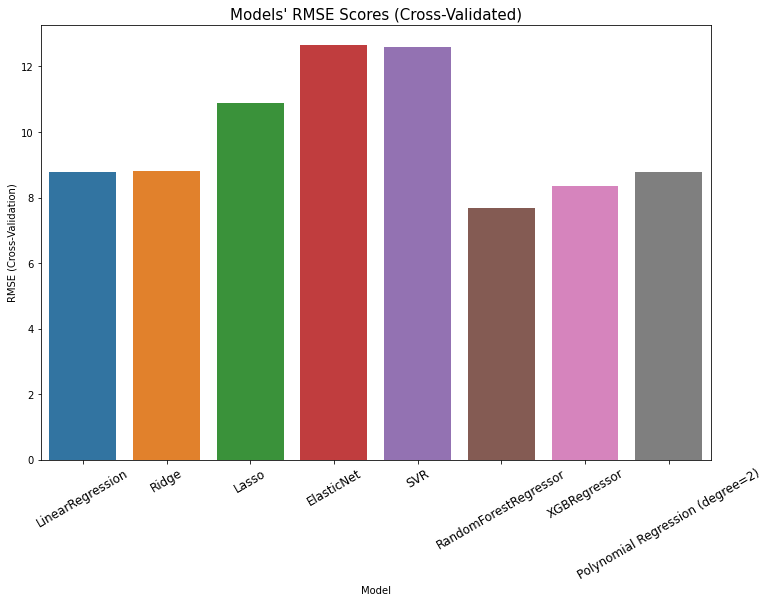

In [32]:
# Bar plot showing the variation of root mean square error (cross-validation) with respect to different models
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

## Hence "RandomForestRegressor" is the best model with the lowest root mean square error (cross-validation). In terms of R2 score "XGBRegressor" is the best model having a R2 score of 0.8124.